# Step 1: Load the IMDb Movie Review Dataset

For this project, we'll use the IMDb movie review dataset from the nltk library.

In [1]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.8 MB/s eta 0:00:00a 0:00:01


Load the dataset and import the necessary libraries:

In [2]:
import nltk
from nltk.corpus import movie_reviews

# Download the movie reviews dataset
nltk.download('movie_reviews')

# Load the movie reviews
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sharipov/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


# Step 2: Data Preprocessing

Next, we'll preprocess the data by converting text reviews into numerical representations using TF-IDF (Term Frequency-Inverse Document Frequency). This will allow us to feed the data into machine learning models.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate features (text) and labels (sentiment)
reviews_text = [" ".join(words) for words, label in reviews]
sentiments = [label for words, label in reviews]

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(reviews_text, sentiments, test_size=0.2, random_state=42)

In [5]:
# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Training a Model

Let's train a machine learning model using the TF-IDF transformed data. We'll use the Support Vector Machine (SVM) classifier for this example. SVM often performs well for text classification tasks.

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True)

In [7]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

In [8]:
# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_classifier.predict_proba(X_test_tfidf)[:, 1])

In [9]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.83      0.83       199
         pos       0.83      0.83      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

ROC AUC Score: 0.9073726843171078


# Step 4: Visualization

Let's visualize the ROC curve to understand the model's performance better.

In [11]:
# Convert string labels to numerical values
y_test_binary = [1 if label == 'pos' else 0 for label in y_test]

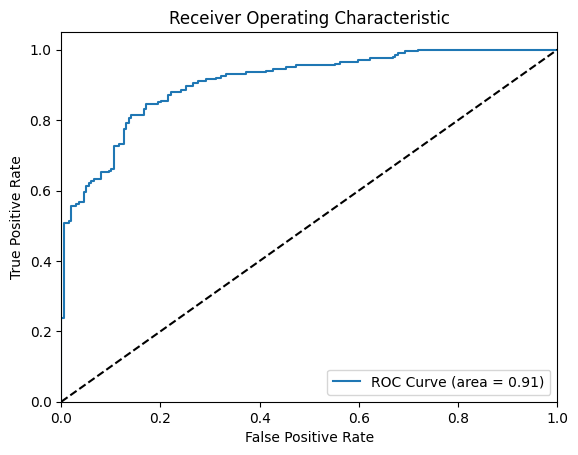

In [12]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, svm_classifier.predict_proba(X_test_tfidf)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Step 5: Hyperparameter Tuning

To achieve the best performance, we can perform hyperparameter tuning for the SVM classifier. We'll use GridSearchCV to search for the best combination of hyperparameters.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search through
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

In [14]:
# Initialize GridSearchCV and perform hyperparameter tuning
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [15]:
# Get the best hyperparameters and the corresponding SVM model
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Step 6: Final Evaluation

We have tuned our model, let's evaluate it on the test set again to see the improvement in performance.

In [16]:
# Make predictions using the best SVM model
y_pred_best = best_svm_classifier.predict(X_test_tfidf)

In [17]:
# Calculate accuracy and other evaluation metrics with the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, best_svm_classifier.predict_proba(X_test_tfidf)[:, 1])

In [18]:
print("Best Model - Accuracy:", accuracy_best)
print("Best Model - Classification Report:\n", report_best)
print("Best Model - ROC AUC Score:", roc_auc_best)

Best Model - Accuracy: 0.83
Best Model - Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.83      0.83       199
         pos       0.83      0.83      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Best Model - ROC AUC Score: 0.9074226855671391


# Step 7: User Input and Prediction

Let's create a function that takes user input (a new movie review) and predicts its sentiment using our best SVM model.

In [19]:
def predict_sentiment(review):
    review_tfidf = tfidf_vectorizer.transform([review])
    prediction = best_svm_classifier.predict(review_tfidf)[0]
    return "positive" if prediction == 'pos' else "negative"

# Step 8: Data Visualization

To present insights from the data, we can create a bar chart to show the distribution of positive and negative reviews in the dataset.

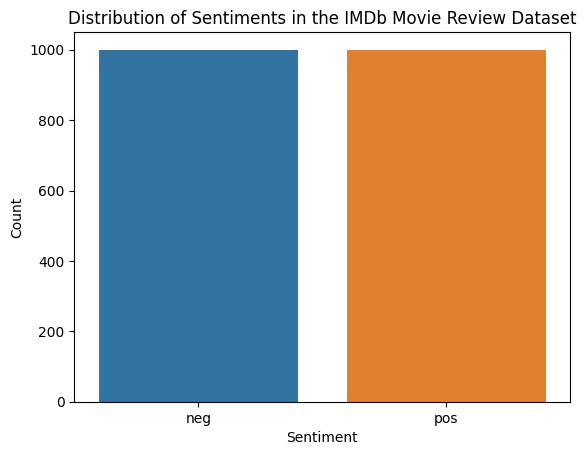

In [20]:
import seaborn as sns

# Create a bar chart for class distribution
sns.countplot(x=sentiments)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in the IMDb Movie Review Dataset')
plt.show()


# Step 9: Conclusion

Finally, we can add a summary of the project, including key findings, insights, and potential areas for improvement.

In [22]:
print("Summary:")
print("1. The SVM model achieved an accuracy of {:.2f}% on the test set.".format(accuracy_best * 100))
print("2. The ROC AUC score of the model is {:.2f}.".format(roc_auc_best))
print("3. The class distribution shows that the dataset is balanced with roughly equal positive and negative reviews.")
print("4. The model could be further improved by exploring more advanced NLP techniques or using deep learning models.")

Summary:
1. The SVM model achieved an accuracy of 83.00% on the test set.
2. The ROC AUC score of the model is 0.91.
3. The class distribution shows that the dataset is balanced with roughly equal positive and negative reviews.
4. The model could be further improved by exploring more advanced NLP techniques or using deep learning models.
